In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os.path as osp

In [8]:
def horizontal_bar(data: pd.DataFrame, ax, *, xticks = None):
    categories_pos = list(range(len(data), 0, -1))

    ax.barh(categories_pos, data.values, zorder=2)

    if xticks:
        ax.set_xticks(xticks)
    ax.set_yticks(categories_pos, data.index)

    ax.set_xlabel('Count')
    ax.set_ylabel(data.index.name)

    ax.grid(which='both', axis='x', zorder=0)

In [2]:
data = pd.read_csv(osp.join('..', 'Data', 'Groceries 1.csv'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [3]:
data.nunique()

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [4]:
data['Date'] = data['Date'].apply(lambda s: s.split('-'))

dates = data['Date'].apply(lambda s: s[0])
months = data['Date'].apply(lambda s: s[1])
years = data['Date'].apply(lambda s: s[2])

data.drop('Date', axis=1, inplace=True)
data['Date'] = dates
data['Month'] = months
data['Year'] = years

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   itemDescription  38765 non-null  object
 2   Date             38765 non-null  object
 3   Month            38765 non-null  object
 4   Year             38765 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
data[['Year', 'Month', 'Date']].drop_duplicates()\
                               .sort_values(['Year', 'Month', 'Date'])\
                               .groupby(['Year', 'Month'])\
                               .count()

Date
Year Month      
2014 01       31
     02       28
     03       31
     04       30
     05       31
     06       30
     07       31
     08       31
     09       30
     10       31
     11       30
     12       30
2015 01       31
     02       28
     03       31
     04       30
     05       31
     06       30
     07       31
     08       31
     09       30
     10       31
     11       30
     12       30

# Preprocess - Duplicated Values

In [6]:
duplicates = data[data.duplicated()]
duplicates

,Member_number,itemDescription,Date,Month,Year
5015,2051,frankfurter,11,09,2015
5022,3055,other vegetables,18,08,2015
5044,1994,whole milk,11,03,2015
5055,1682,pip fruit,25,06,2015
5059,4324,sausage,05,01,2015
...,...,...,...,...,...
38614,2027,domestic eggs,26,02,2014
38684,2936,newspapers,07,03,2014
38685,2311,pot plants,13,03,2014
38722,3834,salty snack,18,05,2014


In [7]:
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 5015 to 38723
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    759 non-null    int64 
 1   itemDescription  759 non-null    object
 2   Date             759 non-null    object
 3   Month            759 non-null    object
 4   Year             759 non-null    object
dtypes: int64(1), object(4)
memory usage: 35.6+ KB


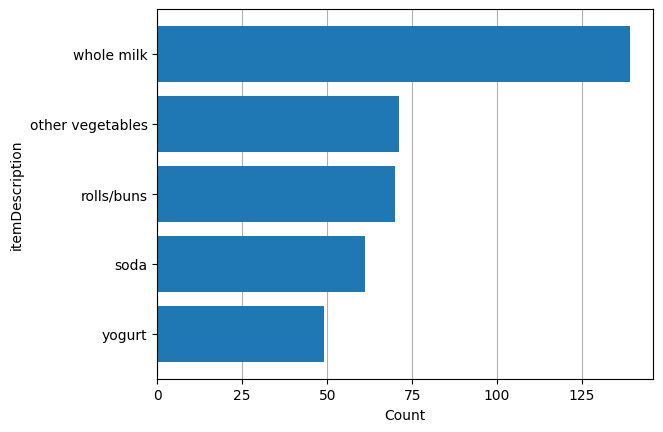

In [9]:
temp = duplicates.groupby('itemDescription')\
                 .count()['Member_number']\
                 .sort_values(ascending=False)
horizontal_bar(temp.iloc[:5], plt.gca(), xticks=range(0, 150, 25))

In [13]:
data = data.drop_duplicates()

# Analysis

## Top 20 Most Frequent Products

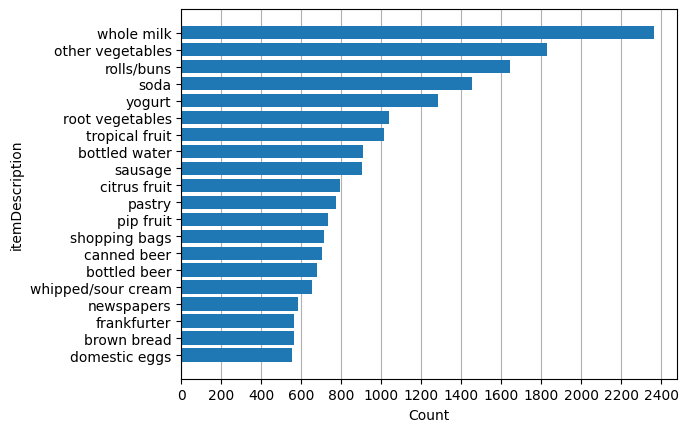

In [14]:
items_count = data.groupby('itemDescription')\
                  .count()['Member_number']\
                  .sort_values(ascending=False)
                  
top = 20
horizontal_bar(items_count.iloc[:top], plt.gca(), xticks=range(0, 2501, 200))

## Top 20 Most Frequent Customers

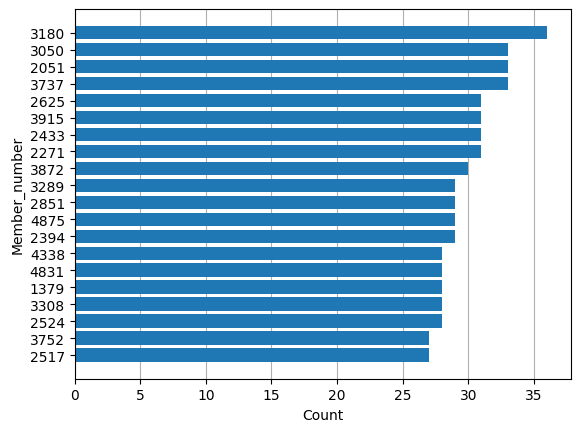

In [10]:
members_count = data.groupby('Member_number')\
                    .count()['Date']\
                    .sort_values(ascending=False)

top = 20
horizontal_bar(members_count.iloc[:top], plt.gca())

## Product Counts By Month

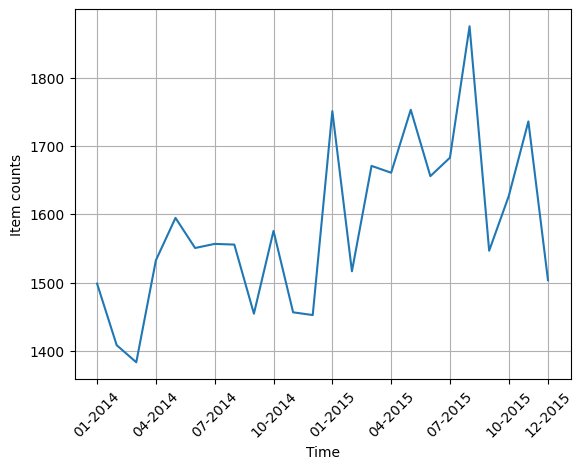

In [74]:
gp_month = data.groupby(['Year', 'Month'])\
                    .count()['Member_number']\
                    .reset_index()

ticks = gp_month['Month'] + '-' + gp_month['Year']
ticks_locs = list(range(0, len(gp_month), 3)) + [len(gp_month) - 1]

ax = plt.gca()
ax.plot(range(len(gp_month)), gp_month['Member_number'].values)
ax.set_xticks(ticks_locs, ticks.loc[ticks_locs], rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Item counts')
ax.grid()
plt.show()

## Top 3 Most-Bought Product Counts By Month 

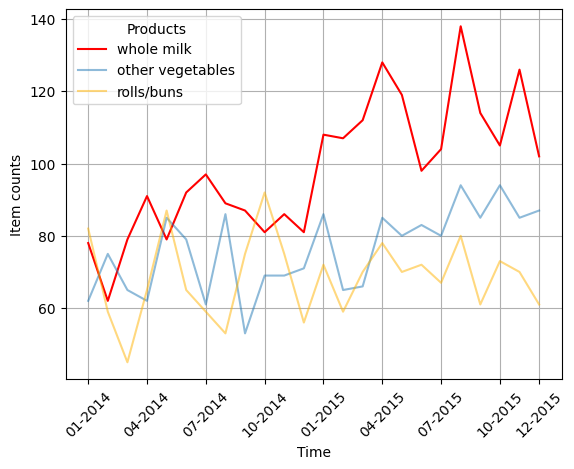

In [ ]:
wm_month = data[data['itemDescription'] == 'whole milk']\
            .groupby(['Year', 'Month'])\
            .count()['Member_number']\
            .reset_index()
ve_month = data[data['itemDescription'] == 'other vegetables']\
            .groupby(['Year', 'Month'])\
            .count()['Member_number']\
            .reset_index()
ro_month = data[data['itemDescription'] == 'rolls/buns']\
            .groupby(['Year', 'Month'])\
            .count()['Member_number']\
            .reset_index()

ticks = wm_month['Month'] + '-' + wm_month['Year']
ticks_locs = list(range(0, len(wm_month), 3)) + [len(wm_month) - 1]

ax = plt.gca()
ax.plot(range(len(wm_month)), wm_month['Member_number'].values,
        label='whole milk', color='red')
ax.plot(range(len(wm_month)), ve_month['Member_number'].values,
        label='other vegetables', alpha=.5)
ax.plot(range(len(wm_month)), ro_month['Member_number'].values,
        label='rolls/buns', color=(1, .7, 0, .5))

ax.set_xticks(ticks_locs, ticks.loc[ticks_locs], rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Item counts')
ax.grid()
ax.legend(title='Products')
plt.show()

# Save Processed Data

In [ ]:
data['Date'] = data['Date'].astype(int)
data['Month'] = data['Month'].astype(int)
data['Year'] = data['Year'].astype(int)
data.to_csv(osp.join('..', 'Data', 'processed.csv'), index=False)